<a href="https://colab.research.google.com/github/vietdung282002/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/DL'
! ls

/content/gdrive/MyDrive/DL
MNIST.ipynb  model.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.utils import plot_model


Load dữ liệu từ MNIST dataset

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
     

(50000, 28, 28)


In [ ]:
X_train.shape[0]

50000

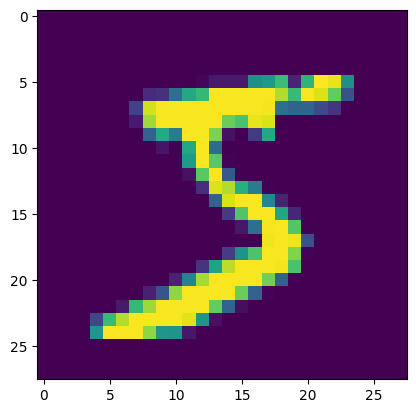

In [ ]:
plt.imshow(X_train[0])

Reshape lại dữ liệu cho đúng yêu cầu đầu vào keras


In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val = X_val.reshape(X_val.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

One hot encoding label


In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Xây dựng model

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = (28,28,1),padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

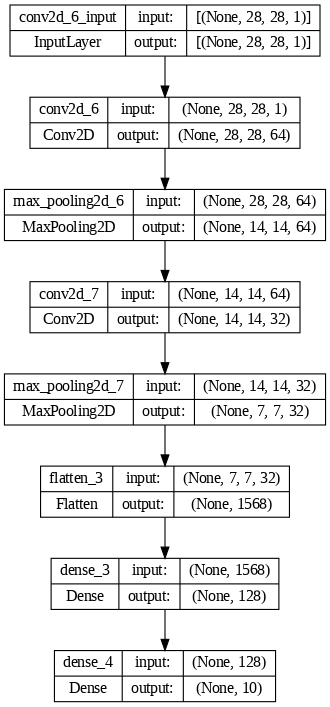

In [ ]:
plot_model(model, show_shapes = True,expand_nested = True,dpi = 80)

Compile model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

Train model

In [ ]:
H = model.fit(X_train, Y_train, validation_data=(X_val,Y_val),batch_size=32, epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.0243 - acc: 0.9941 - val_loss: 0.0872 - val_acc: 0.9858
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0177 - acc: 0.9953 - val_loss: 0.0739 - val_acc: 0.9876
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0174 - acc: 0.9951 - val_loss: 0.1019 - val_acc: 0.9843
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0156 - acc: 0.9959 - val_loss: 0.0905 - val_acc: 0.9883
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0175 - acc: 0.9955 - val_loss: 0.1112 - val_acc: 0.9857
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0164 - acc: 0.9958 - val_loss: 0.0946 - val_acc: 0.9863
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0160 - acc: 0.9961 - val_loss: 0.1280 - val_acc: 0.9842
Epoch 8/10
1563/1563 [==============================] - 7s 5ms

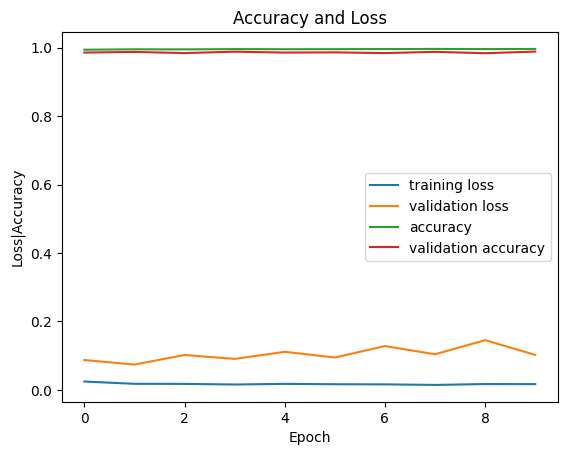

In [ ]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.07960490137338638, 0.9886000156402588]


1/1 [==============================] - 0s 20ms/step
Giá trị dự đoán:  6


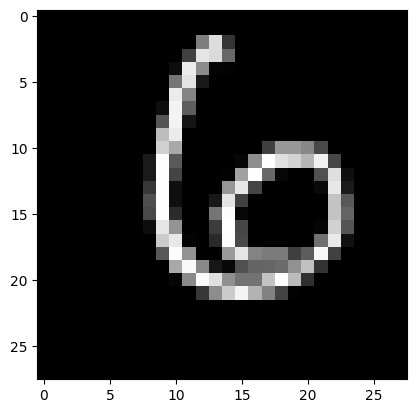

In [ ]:
plt.imshow(X_test[100].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[100].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))